# Task 2

## Requirement

    1. Open any image;
    2. Crop out the fourth quadrant of the image;
    3. Rotate this cropped section by 45 degrees.

    Advanced Task:
        Don’t fall off the edge!

In [17]:
# Import libraries

%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui
import math

<function matplotlib.pyplot.show(close=None, block=None)>

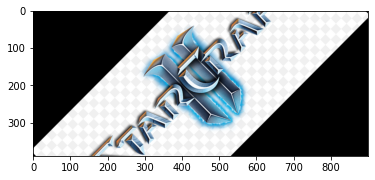

In [80]:
# 1. Open any image;

I = cv2.imread("res\starcraft2_logo2.png")
I = cv2.cvtColor(I,cv2.COLOR_RGB2BGR) # convert RGB to BGR for the palette

#2. Crop out the fourth quadrant of the image;

h, w, d = I.shape

C = I[h - int(h / 2):h, w - int(w / 2):w]
plt.imshow(C)
plt.show

# 3. Rotate this cropped section by 45 degrees.

cx,cy = w / 2, h / 2
d = 45
M = cv2.getRotationMatrix2D(center=(cx,cy), angle=d, scale = 1)
R = cv2.warpAffine(I, M = M, dsize=(w,h))

plt.imshow(R)
plt.show


630 900 651 390


<function matplotlib.pyplot.show(close=None, block=None)>

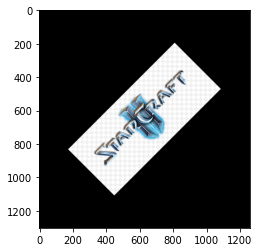

In [81]:
# Advanced task - Don’t fall off the edge!

    # link: https://www.quora.com/How-is-x-x-cos-theta-+-y-sin-theta
    # Sum of two angles
    # X' = r*cos(C) where C = A+B
    # X' = r*cos(A+B) = r*[cos(A)Cos(B) - sin(A)sin(B)]
    # X' = r*cos(A)Cos(B) - r*sin(A)sin(B)
    # X' = Xcos(B) - Ysin(B)

    # translate the centre point (p,q) to the origin first with the plane then
    # translate the plane back to its orignal plane

    #x′=(x−p)cos(θ)−(y−q)sin(θ)+p,
    #y′=(x−p)sin(θ)+(y−q)cos(θ)+q.

rad_d = d * math.pi / 180

new_x1 = int((w - cx) * math.cos(rad_d) - (h - cy) * math.sin(rad_d) + cx)
new_y1 = int((w - cx) * math.sin(rad_d) + (h - cy) * math.cos(rad_d) + cy)
T = np.float32([[1, 0, new_x1 - cx], [0, 1, new_y1 - cy]])
R = cv2.warpAffine(I, M = T, dsize=(new_x1 * 2,new_y1 * 2))
print(new_x1, w, new_y1,h)
M = cv2.getRotationMatrix2D (center=(new_x1,new_y1), angle=d, scale = 1)
R = cv2.warpAffine(R, M = M, dsize=(new_x1 * 2,new_y1 * 2))
plt.imshow(R)
plt.show